First 5 data points:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


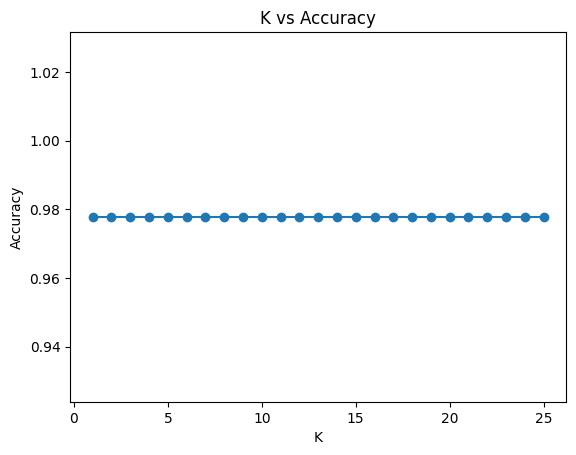


Best K value: 1 with accuracy 0.9778
Final Accuracy with k=1: 0.9778

Confusion Matrix:
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

Labels: ['setosa' 'versicolor' 'virginica']


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

# Load the Iris dataset
data = pd.read_csv('iris.csv')

# Preview the first few data points
print("First 5 data points:")
print(data.head())

# Separate features and target variable
features = data[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].values
target = data["Species"].values

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-NN classifier function
def knn_classifier(X_train, y_train, X_test, k):
    predictions = []

    # Iterate over each test sample
    for test_point in X_test:
        distances = []

        # Calculate the distance between test_point and all training points
        for i in range(len(X_train)):
            dist = euclidean_distance(test_point, X_train[i])
            distances.append((dist, y_train[i]))

        # Sort the distances and take the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]

        # Find the most common class label among the neighbors
        k_nearest_labels = [label for (_, label) in k_nearest_neighbors]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        # Append the predicted class
        predictions.append(most_common)

    return np.array(predictions)

# Function to calculate accuracy
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Function to create a confusion matrix
def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    conf_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

    label_to_index = {label: index for index, label in enumerate(unique_labels)}

    for true, pred in zip(y_true, y_pred):
        conf_matrix[label_to_index[true]][label_to_index[pred]] += 1

    return conf_matrix, unique_labels

# Test the K-NN classifier for different values of k
k_values = range(1, 26)
accuracies = []

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
# Plot the curve for K vs Accuracy
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# Find the value of k with maximum accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K value: {best_k} with accuracy {max(accuracies):.4f}")

# Make predictions using the best K value
best_predictions = knn_classifier(X_train, y_train, X_test, best_k)

# Calculate the accuracy for the best K
final_accuracy = accuracy_score(y_test, best_predictions)
print(f"Final Accuracy with k={best_k}: {final_accuracy:.4f}")

# Generate and print the confusion matrix
conf_matrix, labels = confusion_matrix(y_test, best_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nLabels: {labels}")
